In [ ]:
!pip install utm
!pip install geojson 
!pip install geopandas
!pip install haversine

# 시각화 도구 설치
!pip install plotnine #R 시각화 
!pip install missingno #결측치 시각화
!pip install folium #지도 시각화 

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from plotnine import *
import folium 
import utm
from shapely.geometry import Point, Polygon
from haversine import haversine

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
bike_lscp_300 = pd.read_csv('/content/drive/My Drive/Compas/compas/csv 파일 여기로!/lscp_300.csv')
bike_lscp_300

,Unnamed: 0,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count
0,0,101,8366,9207,19019,0,142127,17,1,419,0,0,0,0,0
1,1,103,4535,5121,23225,0,37794,22,1,0,0,0,0,0,1
2,2,104,13402,9330,30358,0,53381,35,0,0,0,0,0,0,0
3,3,105,2806,2696,24876,0,136789,23,1,349,0,0,0,0,0
4,4,106,4444,2357,11356,8607849,257783,26,1,294,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,350,4190,3662,16480,0,29430,25,0,0,0,0,0,0,0
160,160,351,473,406,21769,0,25007,38,0,0,0,0,0,0,0
161,161,352,0,0,16939,0,25959,13,1,282,0,0,0,0,1
162,162,353,0,0,16907,0,65082,14,1,0,1,0,0,0,0


In [ ]:
bike_lscp_400 = pd.read_csv('/content/drive/My Drive/Compas/compas/csv 파일 여기로!/lscp_400.csv')
bike_lscp_400

,Unnamed: 0,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count
0,0,101,8366,9207,19019,0,210132,19,1,474,1,0,0,0,0
1,1,103,4535,5121,23225,0,65613,24,1,0,0,7,0,0,1
2,2,104,13402,9330,30358,0,63883,34,0,0,0,0,0,0,0
3,3,105,2806,2696,24876,8607849,176252,24,1,349,0,0,0,0,0
4,4,106,4444,2357,11356,8607849,257783,28,1,349,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,350,4190,3662,16480,0,31581,26,0,0,0,1,0,0,1
160,160,351,473,406,21769,0,41669,38,0,0,0,2,0,0,0
161,161,352,0,0,16939,0,81154,14,1,282,0,0,1,0,1
162,162,353,0,0,16907,0,87610,15,1,282,1,0,0,0,1


In [ ]:
Bike_Station=pd.read_csv('/content/drive/My Drive/Compas/compas/SBJ_2007_001/02.자전거스테이션.csv')
Bike_Station

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530
...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231
161,352,◆꿈에그린203동앞,40,37.666425,126.749244
162,353,◆꿈에그린106동앞,40,37.666720,126.750784


### 1. 스테이션 별 거주/유동 인구 대비 대여 반납 비율

In [ ]:
bike_lscp_300['Total_count'] = bike_lscp_300['Loan_count'] + bike_lscp_300['Return_count']

In [ ]:
bike_lscp_300['loan_per_pop'] = bike_lscp_300['Loan_count'] / bike_lscp_300['Population']
bike_lscp_300['return_per_pop'] = bike_lscp_300['Return_count'] / bike_lscp_300['Population']
bike_lscp_300['total_per_pop'] = (bike_lscp_300['Loan_count'] + bike_lscp_300['Return_count']) / bike_lscp_300['Population']

In [ ]:
bike_lscp_300

,Unnamed: 0,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,Total_count,loan_per_pop,return_per_pop,total_per_pop
0,0,101,8366,9207,19019,0,142127,17,1,419,0,0,0,0,0,17573,0.439876,0.484095,0.923971
1,1,103,4535,5121,23225,0,37794,22,1,0,0,0,0,0,1,9656,0.195264,0.220495,0.415759
2,2,104,13402,9330,30358,0,53381,35,0,0,0,0,0,0,0,22732,0.441465,0.307332,0.748798
3,3,105,2806,2696,24876,0,136789,23,1,349,0,0,0,0,0,5502,0.112799,0.108378,0.221177
4,4,106,4444,2357,11356,8607849,257783,26,1,294,0,0,0,0,0,6801,0.391335,0.207555,0.598890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,350,4190,3662,16480,0,29430,25,0,0,0,0,0,0,0,7852,0.254248,0.222209,0.476456
160,160,351,473,406,21769,0,25007,38,0,0,0,0,0,0,0,879,0.021728,0.018650,0.040379
161,161,352,0,0,16939,0,25959,13,1,282,0,0,0,0,1,0,0.000000,0.000000,0.000000
162,162,353,0,0,16907,0,65082,14,1,0,1,0,0,0,0,0,0.000000,0.000000,0.000000


In [ ]:
bike_lscp_300 = bike_lscp_300.astype({'Bike_Station': np.object})
bike_lscp_300.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      164 non-null    int64  
 1   Bike_Station    164 non-null    object 
 2   Loan_count      164 non-null    int64  
 3   Return_count    164 non-null    int64  
 4   Population      164 non-null    int64  
 5   Sub_pop         164 non-null    int64  
 6   Bus_pop         164 non-null    int64  
 7   DN_avg          164 non-null    int64  
 8   Road_yes        164 non-null    int64  
 9   Space_count     164 non-null    int64  
 10  Culture_count   164 non-null    int64  
 11  Sport_count     164 non-null    int64  
 12  KINTEX          164 non-null    int64  
 13  Hosu_yes        164 non-null    int64  
 14  Park_count      164 non-null    int64  
 15  Total_count     164 non-null    int64  
 16  loan_per_pop    164 non-null    float64
 17  return_per_pop  164 non-null    flo

In [ ]:
Bike_Station_300 = Bike_Station.merge(bike_lscp_300, how = 'left', left_on = 'Station_ID', right_on = 'Bike_Station')
Bike_Station_300 = Bike_Station_300[['Station_ID', 'STATION_NAME', '거치대 수량', '위도', '경도','Loan_count', 'Return_count', 'Total_count', 'Population',
       'Sub_pop', 'Bus_pop','loan_per_pop','return_per_pop', 'total_per_pop']]
Bike_Station_300

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,loan_per_pop,return_per_pop,total_per_pop
0,101,어울림마을 701동 앞,20,37.654775,126.834584,8366,9207,17573,19019,0,142127,0.439876,0.484095,0.923971
1,103,대림e-편한세상106동,20,37.660442,126.840377,4535,5121,9656,23225,0,37794,0.195264,0.220495,0.415759
2,104,탄현마을8단지,25,37.698523,126.766042,13402,9330,22732,30358,0,53381,0.441465,0.307332,0.748798
3,105,KT 덕양지사 앞,20,37.655244,126.839261,2806,2696,5502,24876,0,136789,0.112799,0.108378,0.221177
4,106,원당역 앞 공영주차장,30,37.653410,126.842530,4444,2357,6801,11356,8607849,257783,0.391335,0.207555,0.598890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089,4190,3662,7852,16480,0,29430,0.254248,0.222209,0.476456
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231,473,406,879,21769,0,25007,0.021728,0.018650,0.040379
161,352,◆꿈에그린203동앞,40,37.666425,126.749244,0,0,0,16939,0,25959,0.000000,0.000000,0.000000
162,353,◆꿈에그린106동앞,40,37.666720,126.750784,0,0,0,16907,0,65082,0.000000,0.000000,0.000000


In [ ]:
Bike_Station_300.to_csv('/content/drive/My Drive/Compas/LSCP/Bike_LSCP_300.csv', index = False)

### 대여 기준

In [ ]:
Bike_Station_300['loan_per_pop'].describe()

count    164.000000
mean       1.434790
std        3.702959
min        0.000000
25%        0.316797
50%        0.661057
75%        1.401250
max       43.953020
Name: loan_per_pop, dtype: float64

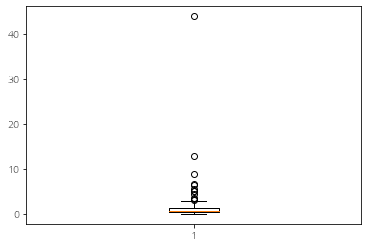

In [ ]:
plt.boxplot(Bike_Station_300['loan_per_pop'])
plt.show()

In [ ]:
Q1 = Bike_Station_300[Bike_Station_300['loan_per_pop']<=0.31]
print(len(Q1))
Q1

37


,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,loan_per_pop,return_per_pop,total_per_pop
1,103,대림e-편한세상106동,20,37.660442,126.840377,4535,5121,9656,23225,0,37794,0.195264,0.220495,0.415759
3,105,KT 덕양지사 앞,20,37.655244,126.839261,2806,2696,5502,24876,0,136789,0.112799,0.108378,0.221177
17,125,꽃우물 공원 앞,30,37.627731,126.827717,8835,7314,16149,28570,0,94806,0.309240,0.256003,0.565243
18,126,지도초등학교 앞,30,37.627947,126.832820,6759,5665,12424,31035,0,53861,0.217786,0.182536,0.400322
20,128,가람중학교 앞 삼거리,20,37.624067,126.840637,6223,3813,10036,37763,0,29186,0.164791,0.100972,0.265763
21,129,햇빛마을 2312동 앞,20,37.622620,126.837174,9655,8856,18511,37071,0,96902,0.260446,0.238893,0.499339
22,130,고양 교통정보센터 앞,15,37.622923,126.833166,9573,6201,15774,34626,0,50886,0.276469,0.179085,0.455554
26,138,롯데마트 고양점 옆,25,37.625559,126.836090,9353,6534,15887,39949,0,67626,0.234124,0.163559,0.397682
28,140,소만마을 806동 앞,20,37.617873,126.841368,6847,4737,11584,37990,0,105677,0.180232,0.124691,0.304922
29,141,용현초등학교 앞,20,37.615570,126.838456,7291,5222,12513,27266,0,30632,0.267403,0.191521,0.458923


In [ ]:
rule1 = 0.31 <= Bike_Station_300['loan_per_pop']
rule2 =Bike_Station_300['loan_per_pop']<= 0.661057
Q2 = Bike_Station_300[rule1&rule2]
print(len(Q2))
Q2

45


,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,loan_per_pop,return_per_pop,total_per_pop
0,101,어울림마을 701동 앞,20,37.654775,126.834584,8366,9207,17573,19019,0,142127,0.439876,0.484095,0.923971
2,104,탄현마을8단지,25,37.698523,126.766042,13402,9330,22732,30358,0,53381,0.441465,0.307332,0.748798
4,106,원당역 앞 공영주차장,30,37.653410,126.842530,4444,2357,6801,11356,8607849,257783,0.391335,0.207555,0.598890
5,110,어울림누리 맞은편,20,37.647972,126.834469,14138,14141,28279,23676,0,84387,0.597145,0.597271,1.194416
6,111,달빛마을3단지 상가 앞,20,37.642908,126.833510,9479,8835,18314,25145,0,76849,0.376974,0.351362,0.728336
7,112,은빛마을5단지 미도파상가,25,37.640952,126.833324,8122,6641,14763,20750,0,106971,0.391422,0.320048,0.711470
8,113,덕양우체국 건너편,30,37.637675,126.835399,11992,10130,22122,19074,0,392,0.628709,0.531089,1.159799
9,114,★덕양구청,30,37.636688,126.831526,13421,11326,24747,21983,14522105,488972,0.610517,0.515216,1.125734
10,115,롯데마트 화정지점 맞은편,30,37.632671,126.829694,8846,6829,15675,27973,0,124141,0.316234,0.244128,0.560362
11,116,세이브존 앞,25,37.634360,126.831342,11767,10634,22401,26423,14522105,531451,0.445332,0.402452,0.847784


In [ ]:
rule1 = 0.661057 <= Bike_Station_300['loan_per_pop']
rule2 =Bike_Station_300['loan_per_pop']<= 1.401250
Q3 = Bike_Station_300[rule1&rule2]
print(len(Q3))
Q3

41


,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,loan_per_pop,return_per_pop,total_per_pop
12,118,화정역 3번 출구,25,37.634831,126.832298,17699,15482,33181,24812,14522105,554878,0.713324,0.623972,1.337296
32,144,행신역 앞,30,37.612495,126.833894,13928,11285,25213,13574,5568132,97732,1.026079,0.831369,1.857448
41,162,원흥역4번 출구,25,37.650634,126.872935,6714,5825,12539,6280,5757420,102859,1.069108,0.927548,1.996656
42,163,원흥역8번 출구,35,37.650620,126.874495,11144,9990,21134,10747,5757420,102686,1.036941,0.929562,1.966502
55,178,★이케아 고양점,40,37.628745,126.862347,3439,2900,6339,4670,0,15418,0.736403,0.620985,1.357388
56,201,고양우편집중국청사,30,37.639539,126.786049,20727,16468,37195,16404,0,33765,1.263533,1.003901,2.267435
57,202,흰돌마을 508동앞,20,37.640895,126.785225,17308,15455,32763,17309,0,38168,0.999942,0.892888,1.892830
59,204,백석역 6번 출구 (신선설농탕),30,37.644231,126.788396,21099,19852,40951,24375,8533226,176207,0.865600,0.814441,1.680041
60,205,백신초교 옆,30,37.644178,126.782632,20816,14839,35655,17039,0,65936,1.221668,0.870884,2.092552
61,206,호수초교 옆,30,37.645415,126.777825,17090,13766,30856,14812,0,16704,1.153794,0.929382,2.083176


In [ ]:
rule1 = 1.401250<= Bike_Station_300['loan_per_pop']
# rule2 =Bike_Station_300['loan_per_pop']<= 1.401250
Q4 = Bike_Station_300[rule1]
print(len(Q4))
Q4

41


,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,loan_per_pop,return_per_pop,total_per_pop
40,161,★학생종합복지센터,25,37.650958,126.867856,9285,8002,17287,4920,0,23683,1.887195,1.626423,3.513618
58,203,★백석역 3번 출구 앞,20,37.642878,126.787558,40987,38143,79130,25231,8533226,184128,1.624470,1.511751,3.136221
62,207,★호수공원 제4주차장 뒤,30,37.649994,126.771965,44682,43198,87880,8915,0,0,5.012002,4.845541,9.857543
63,210,★남정씨티프라자 옆,20,37.663673,126.767099,69549,72191,141740,20468,0,190052,3.397938,3.527018,6.924956
64,211,★정발산역 2번 출구 (롯데백화점),30,37.659728,126.772704,55843,51498,107341,8419,6843625,198848,6.632973,6.116878,12.749852
65,212,★정발산역 4번 출구 일산동구청 방면,30,37.658467,126.774201,41383,37481,78864,7593,6843625,342311,5.450151,4.936257,10.386409
66,213,마두1동 사거리,25,37.659119,126.787998,29771,25978,55749,18917,0,42102,1.573770,1.373262,2.947032
67,214,★마두역 교보생명 옆,20,37.652090,126.777358,47859,44060,91919,22819,6222179,311690,2.097331,1.930847,4.028178
68,215,마두역 7번 출구,25,37.652254,126.778848,61514,51688,113202,21992,6222179,311690,2.797108,2.350309,5.147417
70,217,강촌공원 육교 앞,30,37.654141,126.783673,36657,28519,65176,25969,0,882,1.411568,1.098194,2.509762


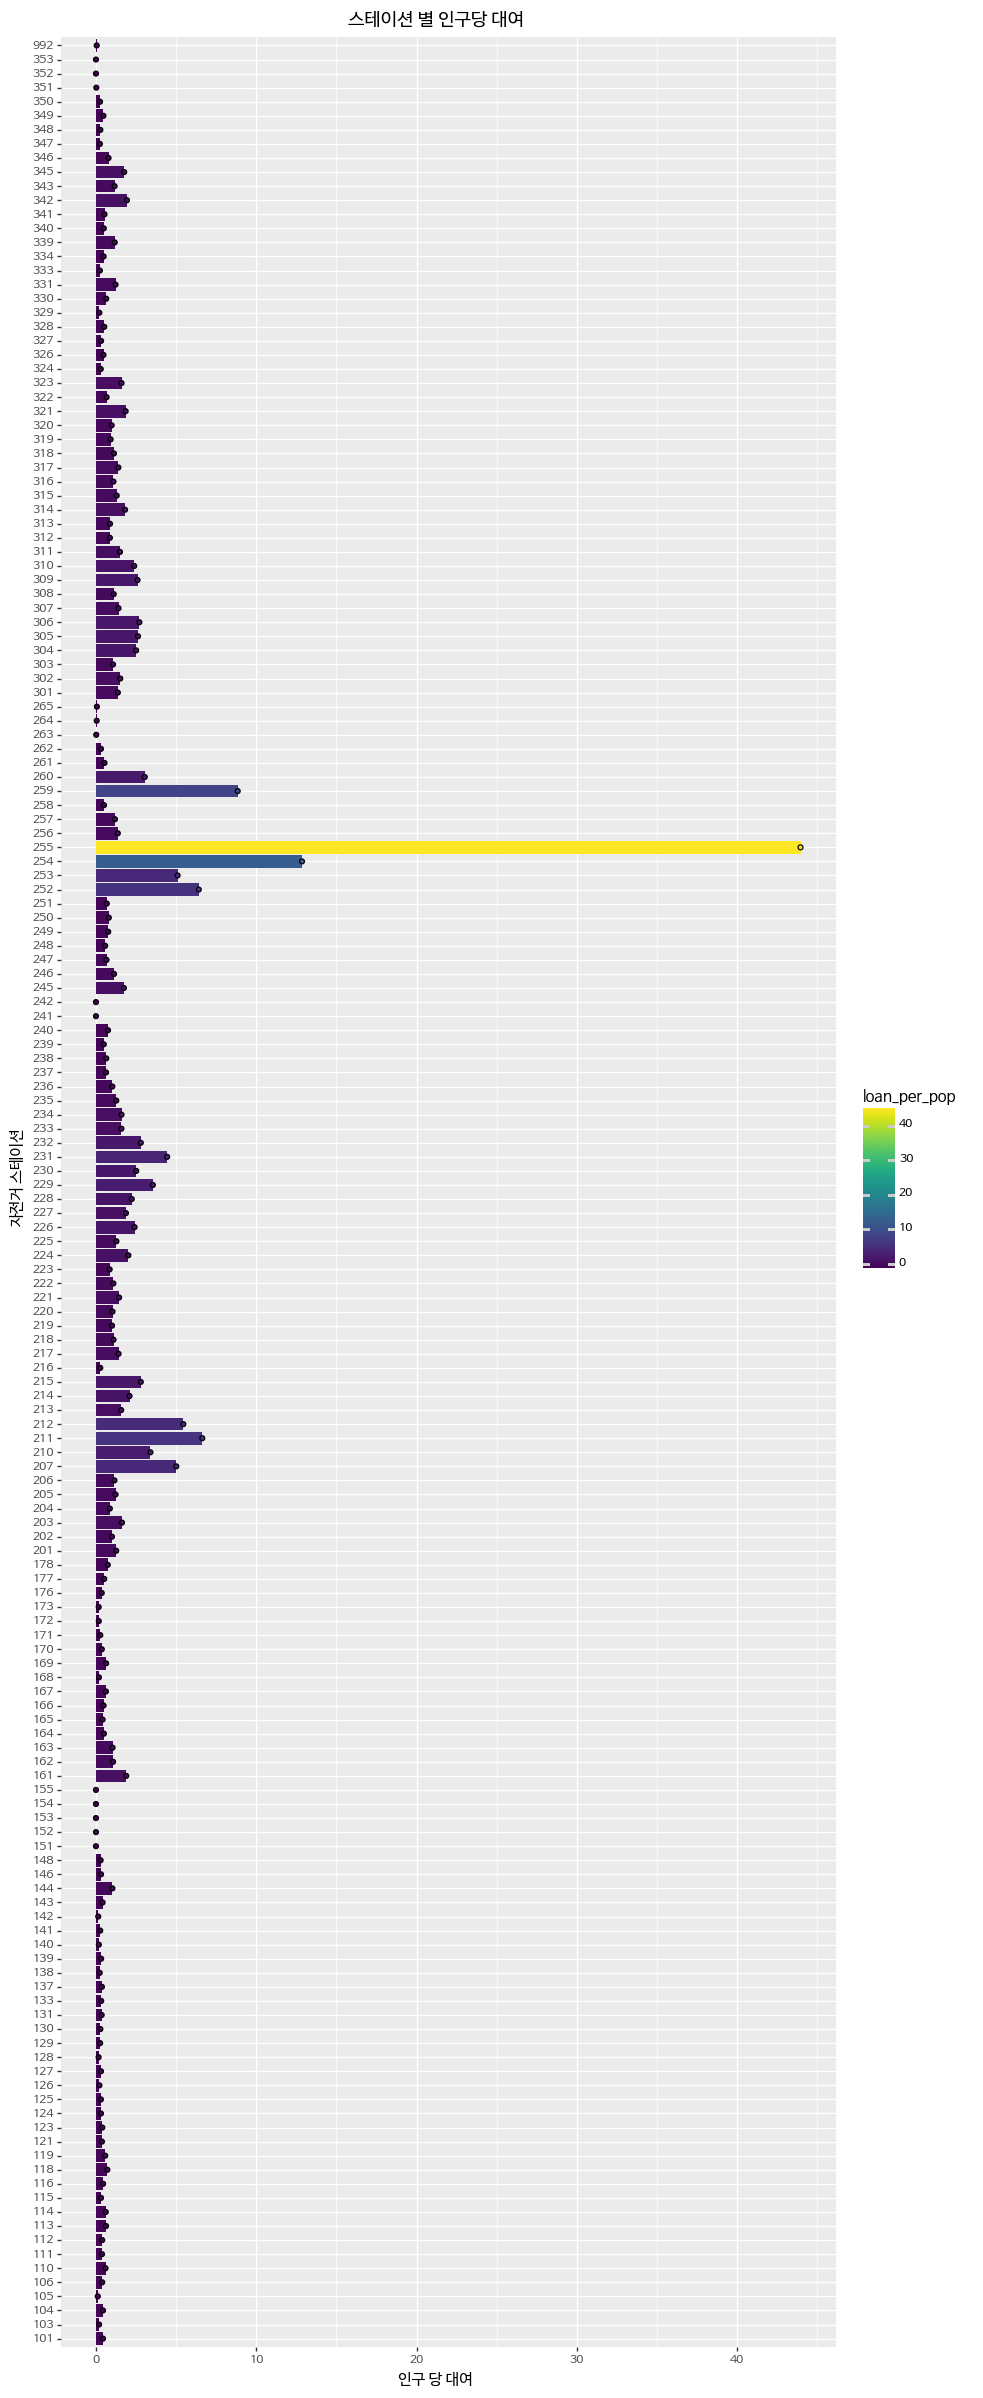

<ggplot: (-9223363254412954620)>

In [ ]:
(ggplot(bike_lscp_300)
+ aes(x = 'Bike_Station', y = 'loan_per_pop', fill = 'loan_per_pop')
+ geom_bar(stat = 'identity')+coord_flip() 
+ geom_point()
+ labs(x='자전거 스테이션', y='인구 당 대여', title = '스테이션 별 인구당 대여')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,30))
        
)

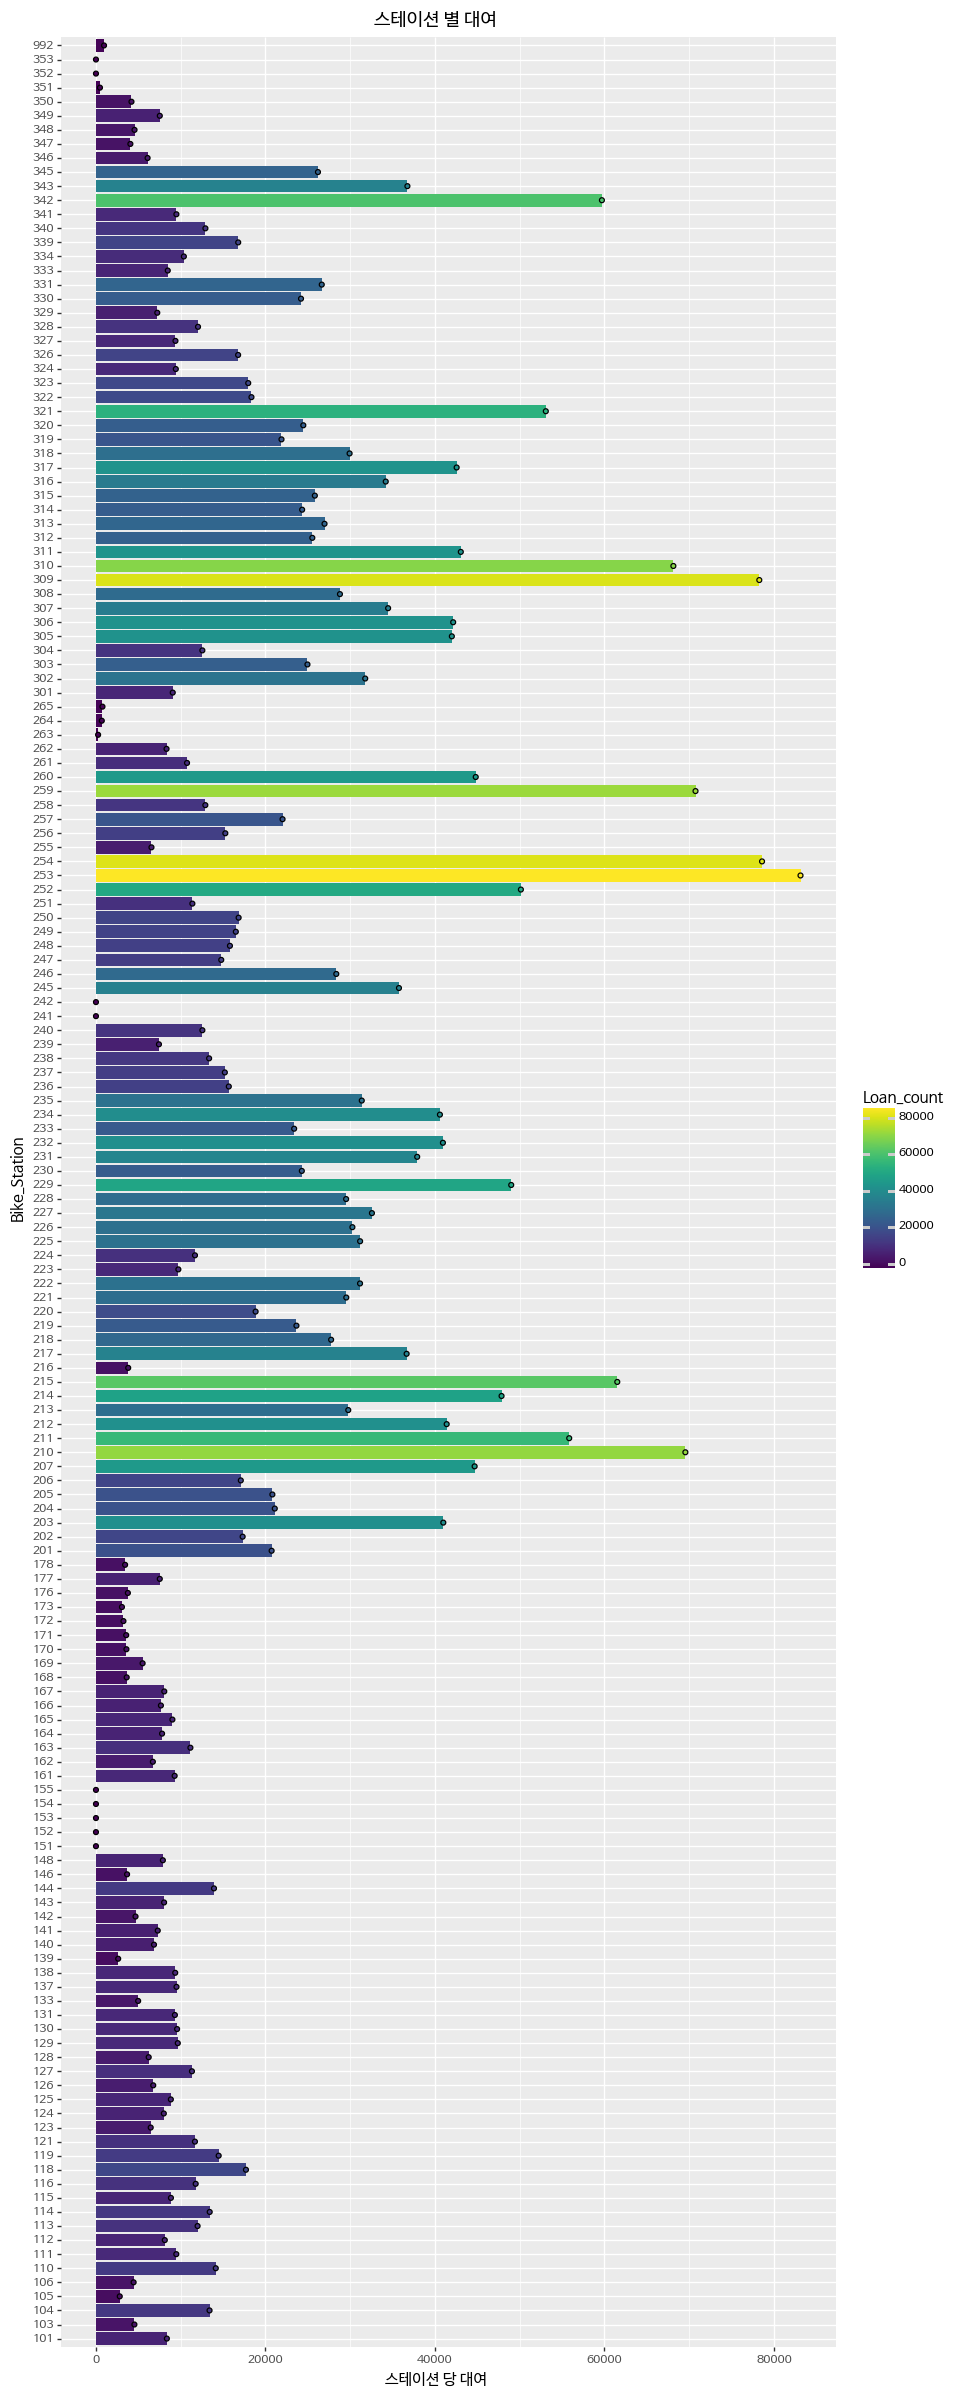

<ggplot: (-9223363262545661096)>

In [ ]:
(ggplot(bike_lscp_300)
+ aes(x = 'Bike_Station', y = 'Loan_count', fill = 'Loan_count')
+ geom_bar(stat = 'identity')+coord_flip() 
+ geom_point()
+ labs(x='Bike_Station', y='스테이션 당 대여', title = '스테이션 별 대여')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,30))
        
)

In [ ]:
lat, longi = 37.66714305514331, 126.82008045013437
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

for index, row in Q1.iterrows():
  title = row['Station_ID']
  color = 'red'
  if row['Loan_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.0001*row['Loan_count'], color = color ).add_to(m)

for index, row in Q2.iterrows():
  title = row['Station_ID']
  color = 'green'
  if row['Loan_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.0001*row['Loan_count'], color = color ).add_to(m)

for index, row in Q3.iterrows():
  title = row['Station_ID']
  color = 'blue'
  if row['Loan_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.0001*row['Loan_count'], color = color ).add_to(m)

for index, row in Q4.iterrows():
  title = row['Station_ID']
  color = 'purple'
  if row['Loan_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.0001*row['Loan_count'], color = color ).add_to(m)

m

### 반납 기준

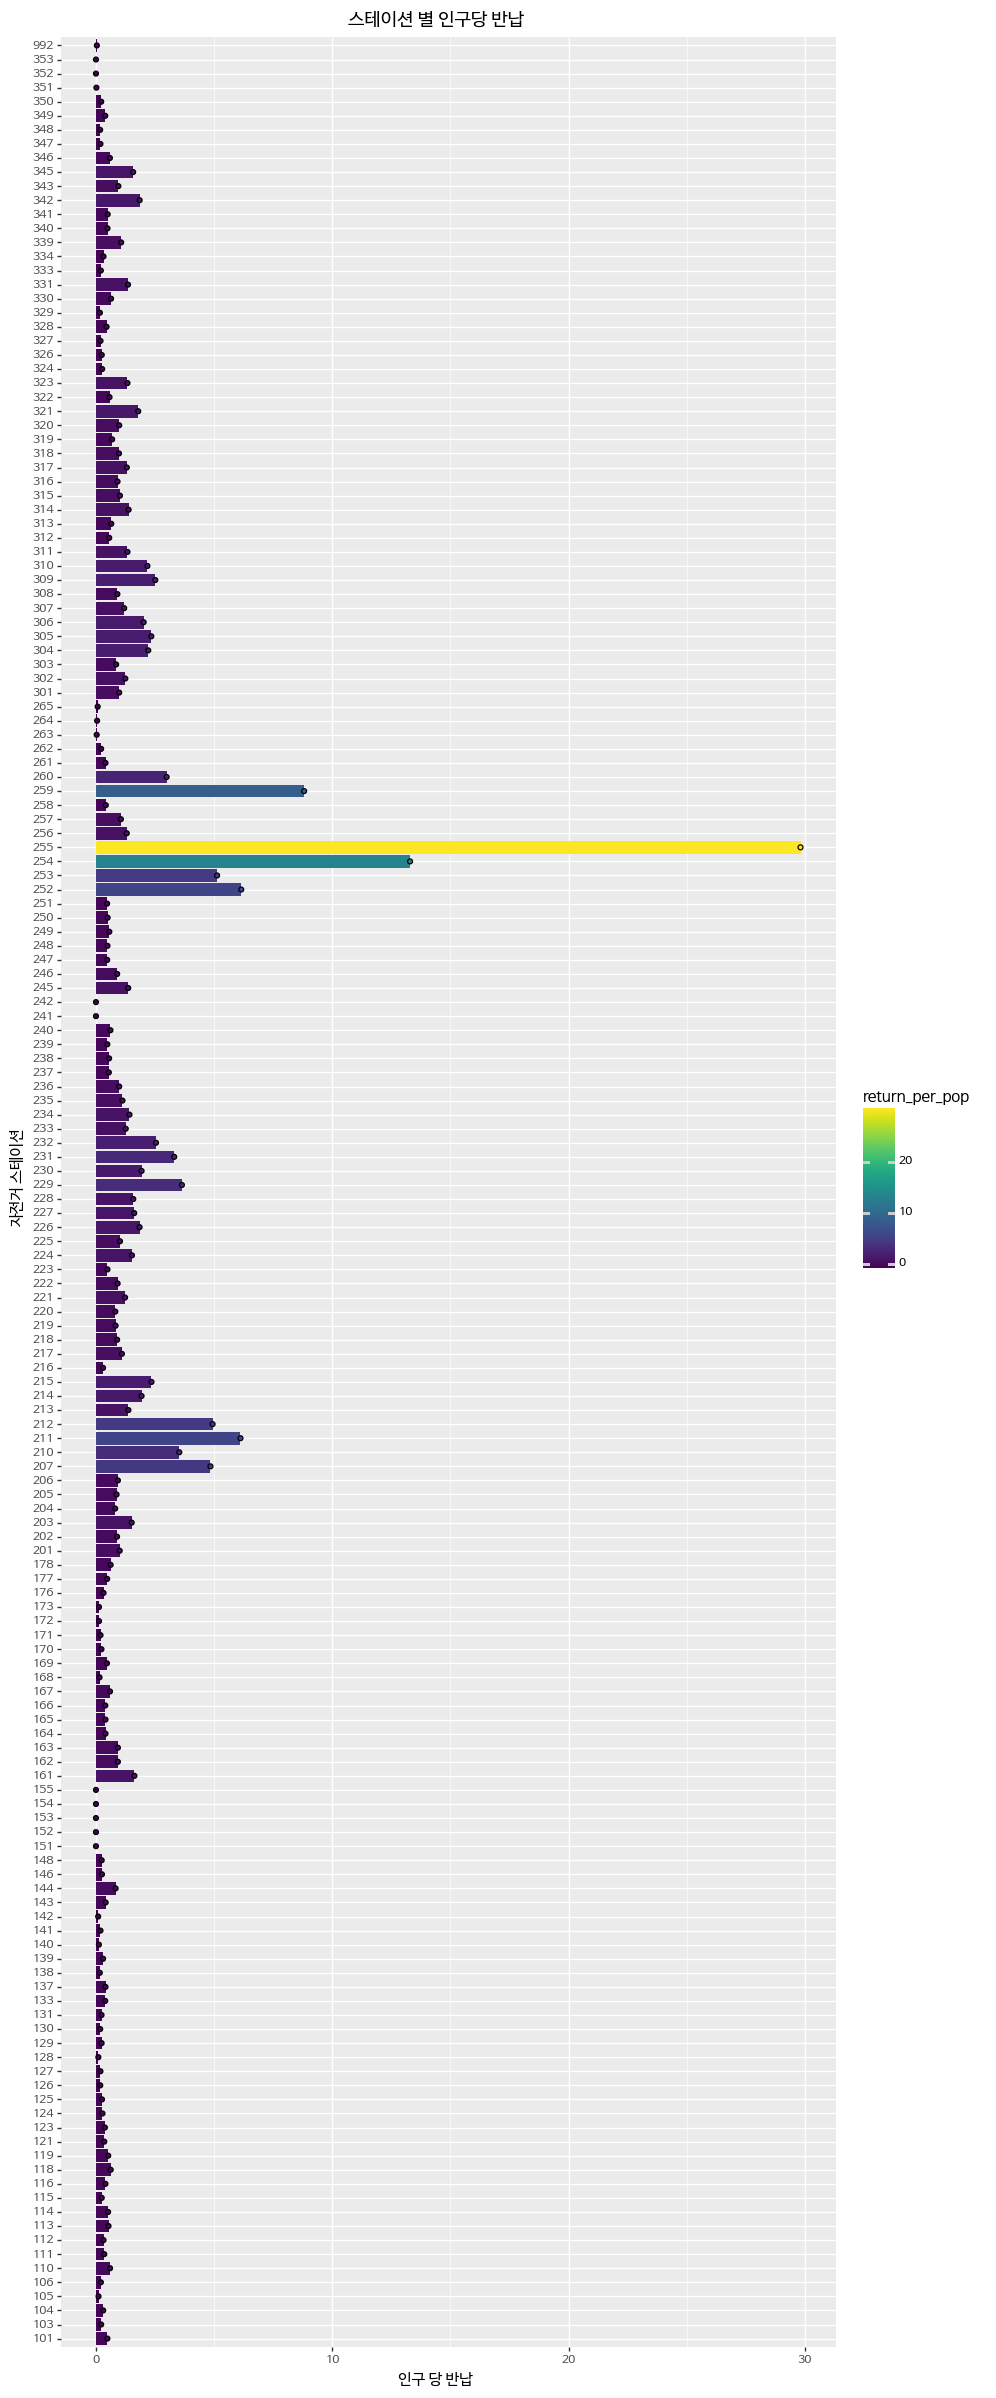

<ggplot: (-9223363262549071381)>

In [ ]:
(ggplot(bike_lscp_300)
+ aes(x = 'Bike_Station', y = 'return_per_pop', fill = 'return_per_pop')
+ geom_bar(stat = 'identity')+coord_flip() 
+ geom_point()
+ labs(x='자전거 스테이션', y='인구 당 반납', title = '스테이션 별 인구당 반납')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,30)) 
)

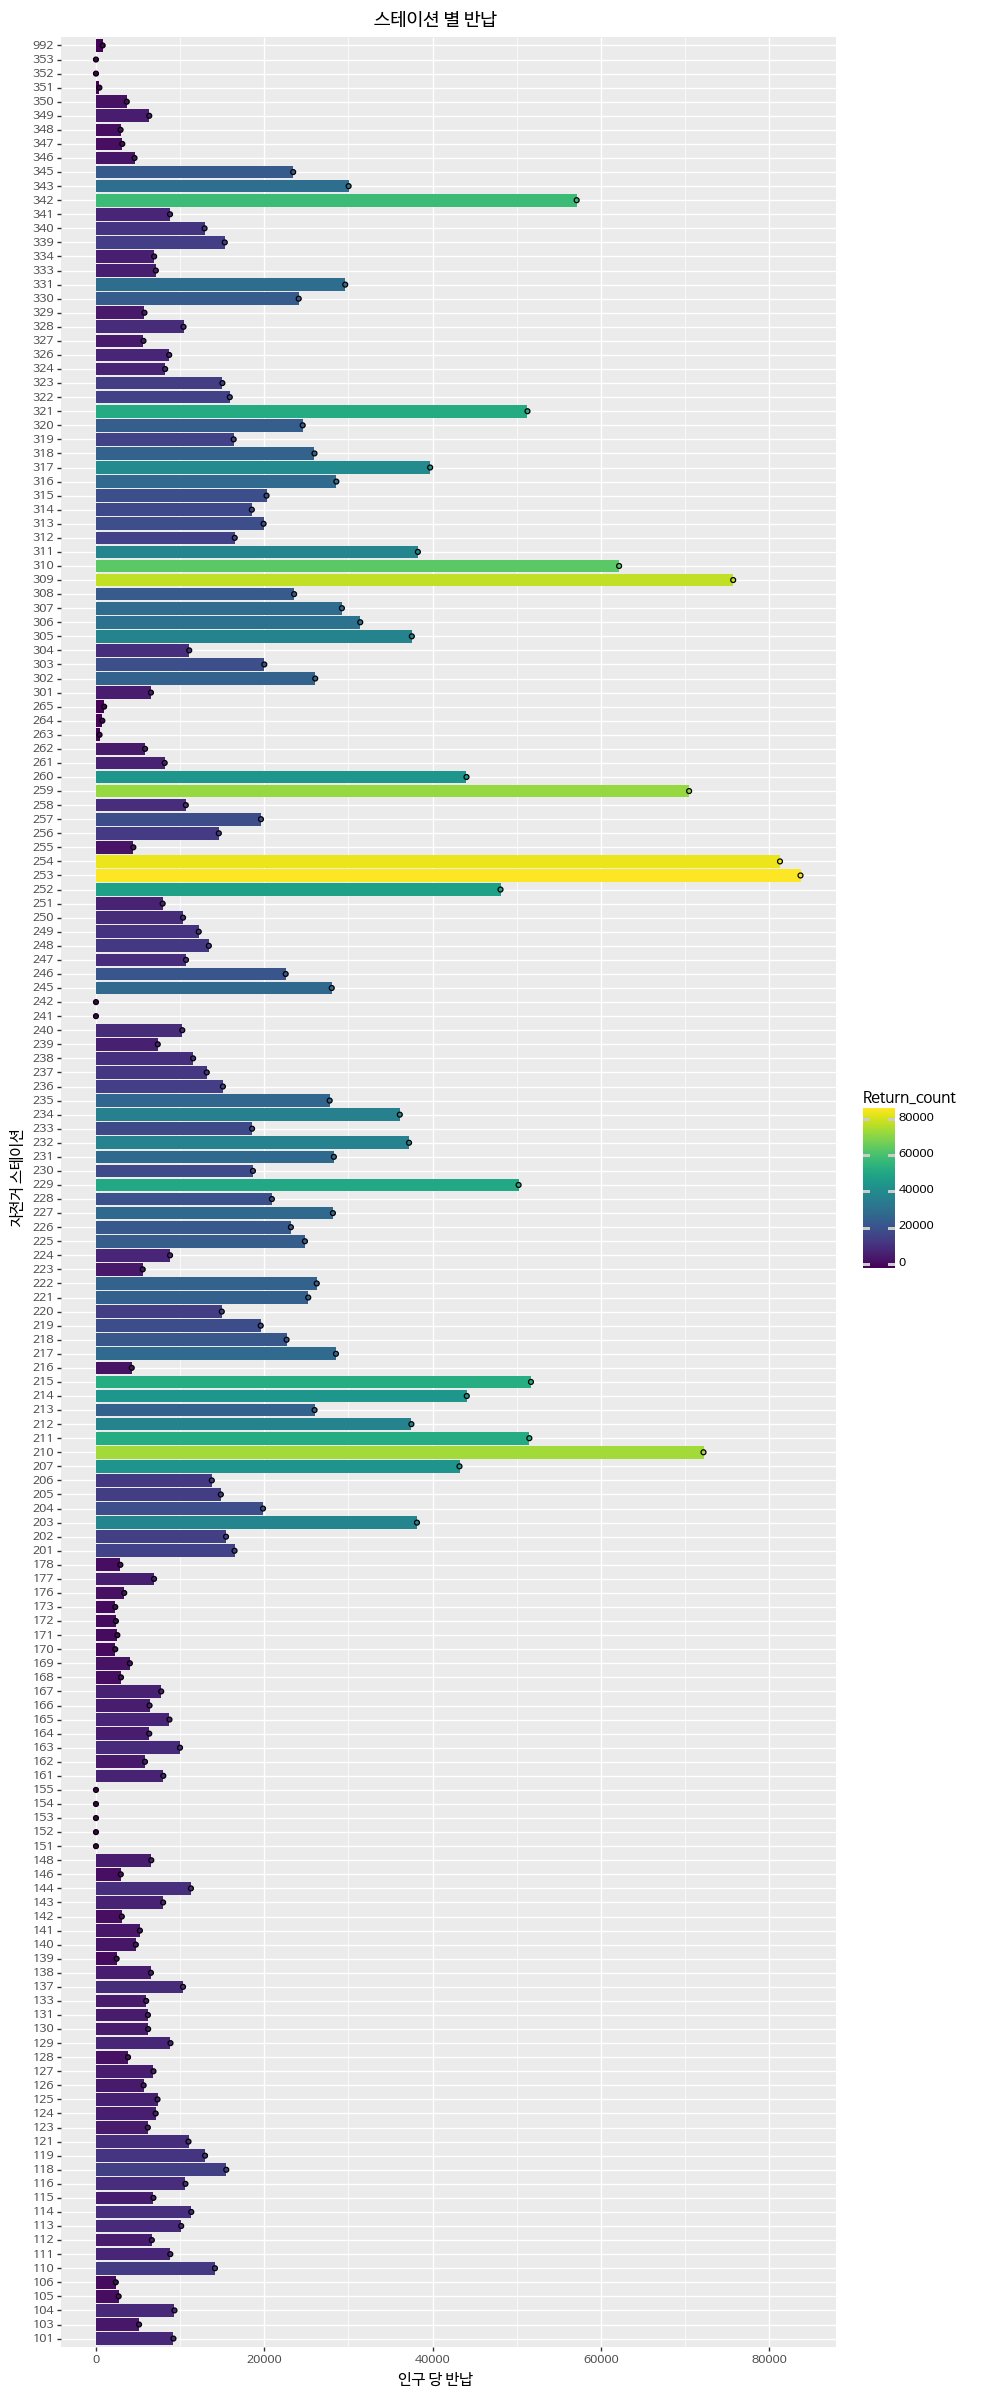

<ggplot: (8774305374521)>

In [ ]:
(ggplot(bike_lscp_300)
+ aes(x = 'Bike_Station', y = 'Return_count', fill = 'Return_count')
+ geom_bar(stat = 'identity')+coord_flip() 
+ geom_point()
+ labs(x='자전거 스테이션', y='인구 당 반납', title = '스테이션 별 반납')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,30)) 
)

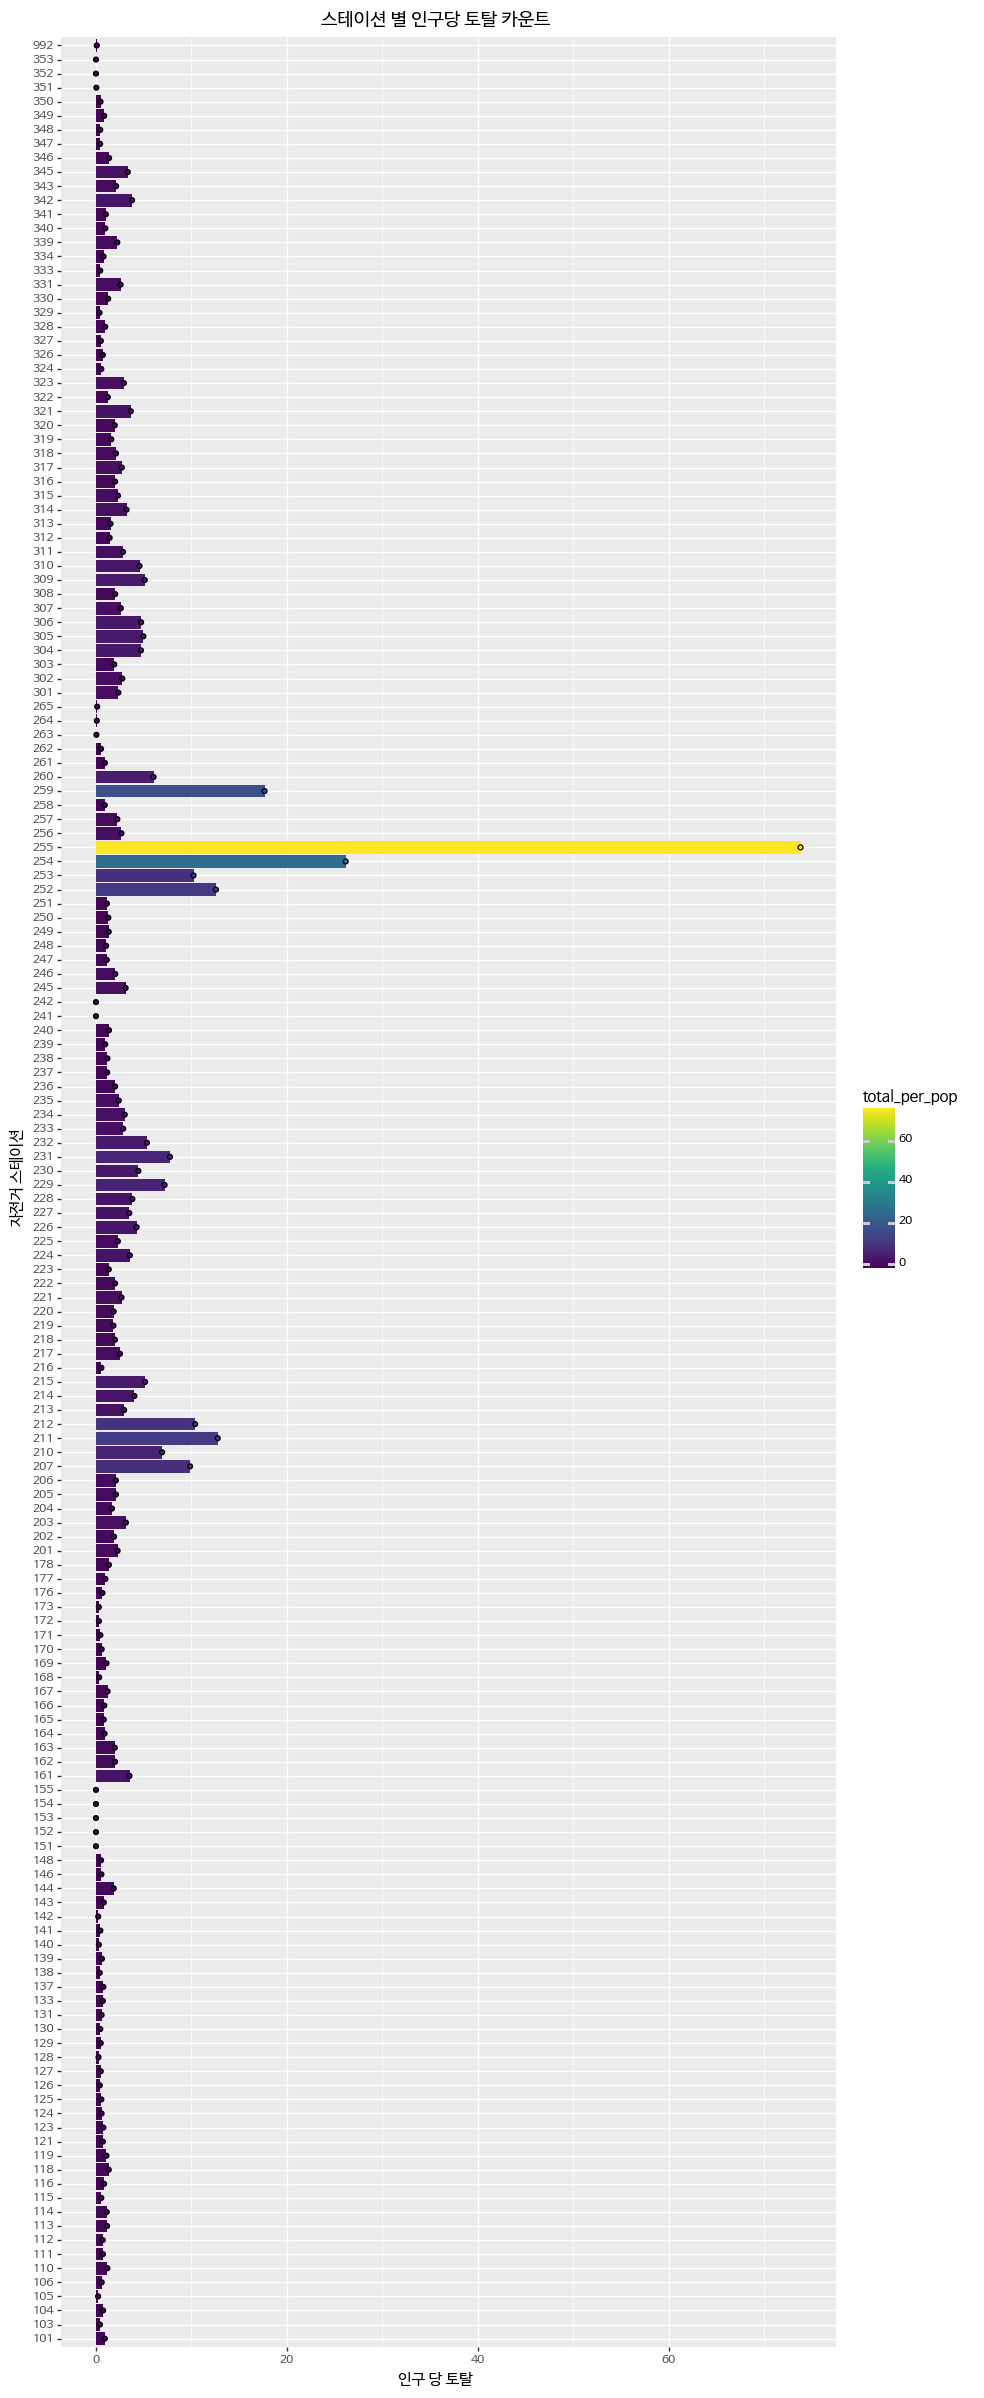

<ggplot: (-9223363262550254069)>

In [ ]:
(ggplot(bike_lscp_300)
+ aes(x = 'Bike_Station', y = 'total_per_pop', fill = 'total_per_pop')
+ geom_bar(stat = 'identity')+coord_flip() 
+ geom_point()
+ labs(x='자전거 스테이션', y='인구 당 토탈', title = '스테이션 별 인구당 토탈 카운트')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,30)) 
)

### 반납 + 대여

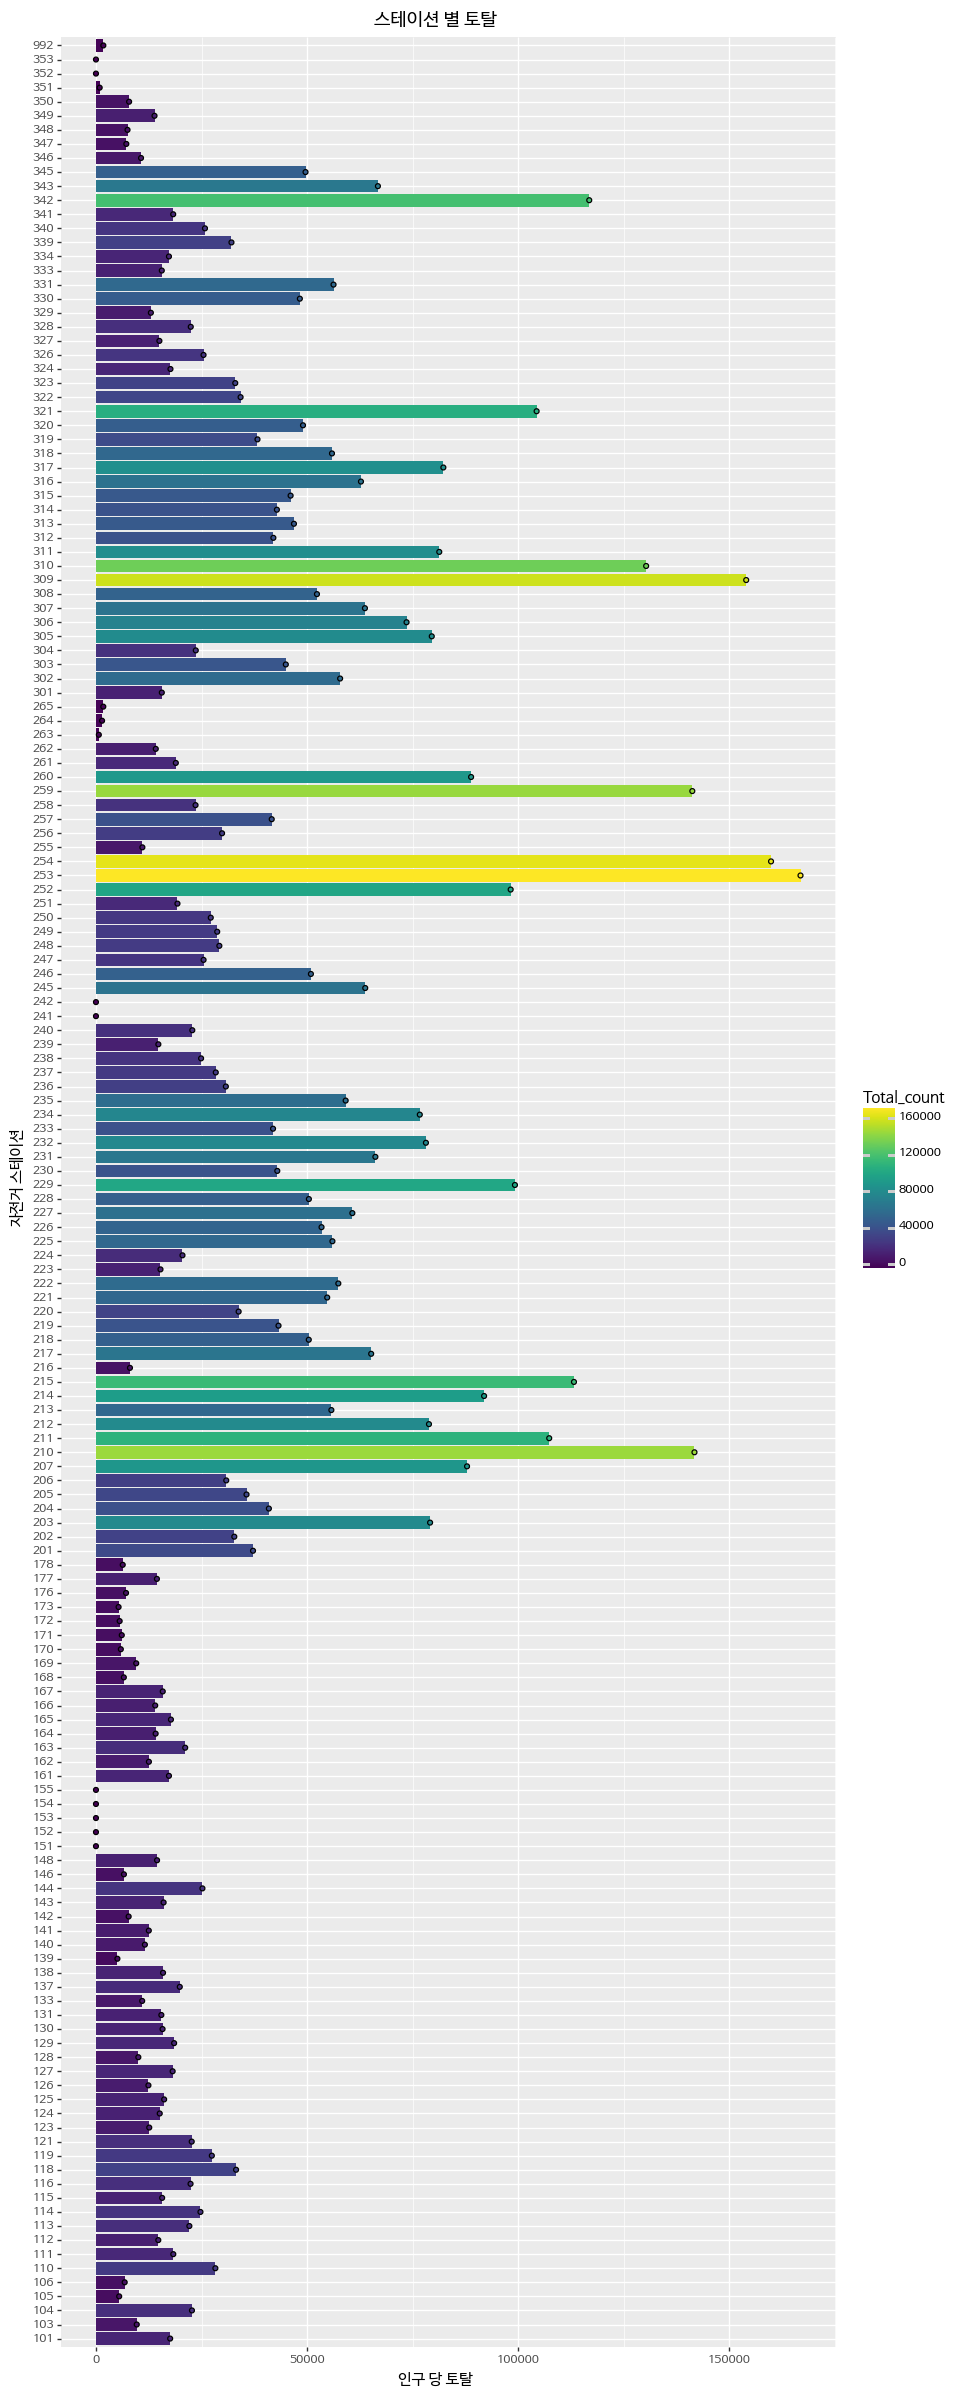

<ggplot: (-9223363262549830098)>

In [ ]:
(ggplot(bike_lscp_300)
+ aes(x = 'Bike_Station', y = 'Total_count', fill = 'Total_count')
+ geom_bar(stat = 'identity')+coord_flip() 
+ geom_point()
+ labs(x='자전거 스테이션', y='인구 당 토탈', title = '스테이션 별 토탈')
+ theme(text = element_text(family = "NanumBarunGothic"), figure_size = (10,30)) 
)

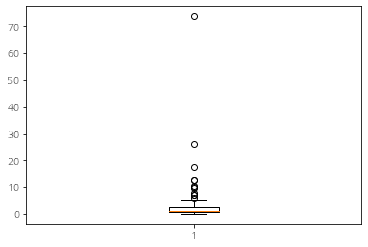

In [ ]:
plt.boxplot(bike_lscp_300['total_per_pop'])
plt.show()

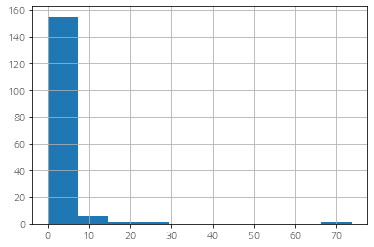

In [ ]:
bike_lscp_300['total_per_pop'].hist()

In [ ]:
bike_lscp_300['total_per_pop'].describe()

count    164.000000
mean       2.649681
std        6.421658
min        0.000000
25%        0.571515
50%        1.225702
75%        2.618760
max       73.771812
Name: total_per_pop, dtype: float64

In [ ]:
Bike_Station_300[Bike_Station_300['Total_count']==0]

,Station_ID,STATION_NAME,거치대 수량,위도,경도,Loan_count,Return_count,Total_count,Population,Sub_pop,Bus_pop,loan_per_pop,return_per_pop,total_per_pop
35,151,◆향동지구 10단지 151,40,37.607051,126.894917,0,0,0,4989,0,16325,0.0,0.0,0.0
36,152,◆향동지구 2단지 152,40,37.601162,126.895028,0,0,0,6491,0,3943,0.0,0.0,0.0
37,153,◆향동지구 4단지 153,40,37.595718,126.892157,0,0,0,10151,0,10299,0.0,0.0,0.0
38,154,◆향동지구 1단지 154,40,37.594102,126.890306,0,0,0,8906,0,25155,0.0,0.0,0.0
39,155,◆향동 덕은교 155,40,37.591856,126.882963,0,0,0,2484,0,0,0.0,0.0,0.0
94,241,◆동국대병원 사거리,37,37.674051,126.806167,0,0,0,10796,0,82520,0.0,0.0,0.0
95,242,◆식사 3단지 분수대 옆,43,37.681718,126.812546,0,0,0,22733,0,58095,0.0,0.0,0.0
161,352,◆꿈에그린203동앞,40,37.666425,126.749244,0,0,0,16939,0,25959,0.0,0.0,0.0
162,353,◆꿈에그린106동앞,40,37.666720,126.750784,0,0,0,16907,0,65082,0.0,0.0,0.0


In [ ]:
lat, longi = 37.66714305514331, 126.82008045013437
center = (lat, longi); zoom = 12

m = folium.Map(location=center, zoom_start=zoom)

for index, row in Bike_Station_300.iterrows():
  title = row['Station_ID']
  color = 'green'
  if row['Total_count'] == 0:
    color = 'black'
  folium.CircleMarker([row['위도'], row['경도']], tooltip = title, radius = 0.00005*row['Total_count'], color = color ).add_to(m)
m

In [ ]:
# 자전거 스테이션 구역 파악하고 싶음... how? 